In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
def evalf(x):
  assert type(x) is np.ndarray 
  assert len(x) == 2 
  return (x[0]+100)**2 + (x[1]-25)**2

In [73]:
def evalg(x):  
  assert type(x) is np.ndarray and len(x) == 2 
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [74]:
def find_minimizer(start_x, tol, step_length):
  global k
  assert type(start_x) is np.ndarray and len(start_x) == 2
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  fvals = [evalf(x)]
  while (np.linalg.norm(g_x) > tol):
    x = np.subtract(x, np.multiply(step_length,g_x))
    k += 1 
    g_x = evalg(x) 
    fvals.append(evalf(x))
  return x, fvals 

#2. [R] What is the minimizer and minimum function value of f(x) = f(x1, x2) = (x1 + 100)2 + (x2 − 25)2 ?

#Solution:

minimizer: [-99.99958844  24.99994388]

minimum function value: 1.725310880028136e-07

In [75]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

Optimizer: [-99.99958844  24.99994388]


In [76]:
minimizer=np.array([-99.99958844,24.99994388])
print('f(my_x) is:',evalf(minimizer))




f(my_x) is: 1.725310880028136e-07


Text(0, 0.5, 'f(x)')

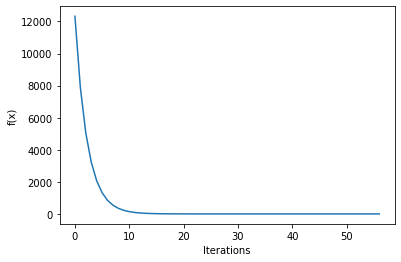

In [77]:
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')


#3. [R] With starting point x0 = (10, 10) and η = 0.1, we will now study the behavior of the algorithm for different tolerance values. Try τ = 10−p where p = 1, 2, . . . , 10. For each τ , record the final minimizer, final objective function value and number of iterations taken by the algorithm to terminate. Prepare a plot where the number of iterations is plotted against τ values. Comment on the observations. Comment about the minimizers and objective function values obtained for different choices of the tolerance values.


#Solution:

|index|final\_minimizer|final\_objective|number\_of\_iterations|
|---|---|---|---|
|0|\[-99\.9553787   24\.99391528\]|0\.0020280843668995063|35|
|1|\[-99\.99520882  24\.99934666\]|2\.3382220797474075e-05|45|
|2|\[-99\.99958844  24\.99994388\]|1\.7253033717248775e-07|56|
|3|\[-99\.99995581  24\.99999397\]|1\.989139359193299e-09|66|
|4|\[-99\.99999526  24\.99999935\]|2\.293321544605827e-11|76|
|5|\[-99\.99999959  24\.99999994\]|1\.6921726745458407e-13|87|
|6|\[-99\.99999996  24\.99999999\]|1\.950942200128245e-15|97|
|7|\[-100\.   25\.\]|2\.249273021138356e-17|107|
|8|\[-100\.   25\.\]|1\.6597088735501767e-19|118|
|9|\[-100\.   25\.\]|1\.9135732950098918e-21|128|

tolerance value increses the corresponding number of iterations are decreses

minimizer reachs to [-100.,   25.]

objective function values approach to zero



In [84]:
my_start_x = np.array([10,10])
my_steplength = 0.1
p=[1,2,3,4,5,6,7,8,9,10]
my_tol=[]
for i in p:
  tol= 10**(-i) 
  my_tol.append(tol)
print(my_tol)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]


In [85]:
final_minimizer=[]
final_objective=[]
number_of_iterations=[]
my_start_x = np.array([10,10])
my_steplength = 0.1
for i in my_tol:
  new_tol=i
  opt_x, fvals_ret = find_minimizer(my_start_x, new_tol, my_steplength)
  final_minimizer.append(opt_x)
  final_objective.append(evalf(opt_x))
  number_of_iterations.append(k)




In [86]:
final_minimizer

[array([-99.9553787 ,  24.99391528]),
 array([-99.99520882,  24.99934666]),
 array([-99.99958844,  24.99994388]),
 array([-99.99995581,  24.99999397]),
 array([-99.99999526,  24.99999935]),
 array([-99.99999959,  24.99999994]),
 array([-99.99999996,  24.99999999]),
 array([-100.,   25.]),
 array([-100.,   25.]),
 array([-100.,   25.])]

In [87]:
final_objective

[0.0020280843668995063,
 2.3382220797474075e-05,
 1.7253033717248775e-07,
 1.989139359193299e-09,
 2.293321544605827e-11,
 1.6921726745458407e-13,
 1.950942200128245e-15,
 2.249273021138356e-17,
 1.6597088735501767e-19,
 1.9135732950098918e-21]

In [88]:
number_of_iterations

[35, 45, 56, 66, 76, 87, 97, 107, 118, 128]

In [89]:
plt.plot(my_tol,number_of_iterations)
plt.xlabel('tolerance value')
plt.ylabel('number_of_iterations')


Text(0, 0.5, 'number_of_iterations')

#4. [R] With starting point x0 = (10, 10) and τ = 10−5, we will study the behavior of the algorithm for different step length values. Try η ∈ {0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9}. For each η, record the finalminimizer, final objective function value and number of iterations taken by the algorithm to terminate. Preparea plot where the number of iterations is plotted against η values. Comment on the observations. Comment about the minimizers and objective function values obtained for different choices of the step length values.


#Solution:

|index|final\_minimizer|final\_objective|number\_of\_iterations|
|---|---|---|---|
|0|\[-99\.99999505  24\.99999932\]|2\.49936770204995e-11|84571|
|1|\[-99\.99999505  24\.99999933\]|2\.494219709847674e-11|8450|
|2|\[-99\.99999512  24\.99999933\]|2\.4304673044883465e-11|838|
|3|\[-99\.99999526  24\.99999935\]|2\.293321544605827e-11|76|
|4|\[-99\.99999685  24\.99999957\]|1\.011747066175869e-11|34|
|5|\[-99\.99999775  24\.99999969\]|5\.169479687800271e-12|11|
|6|\[-100\.   25\.\]|0\.0|1|
|7|\[-100\.00000225   25\.00000031\]|5\.169479687800271e-12|11|
|8|\[-100\.00000302   25\.00000041\]|9\.312506683476372e-12|19|
|9|\[-99\.99999685  24\.99999957\]|1\.011747066175869e-11|34|
|10|\[-99\.99999526  24\.99999935\]|2\.293321544605827e-11|76|

n value(step lenght) increses in 0.0001 to 0.5 and the number of iterations decreses after 0.5 the n value are increses and  number of iterations is minimum at n value =0.5



In [91]:
final_minimizer1=[]
final_objective1=[]
number_of_iterations1=[]
n=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
my_start_x = np.array([10,10])
for i in n:
  my_steplength = i
  my_tol= 10**(-5)
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  final_minimizer1.append(opt_x)
  final_objective1.append(evalf(opt_x))
  number_of_iterations1.append(k)
  

In [92]:
final_minimizer1

[array([-99.99999505,  24.99999932]),
 array([-99.99999505,  24.99999933]),
 array([-99.99999512,  24.99999933]),
 array([-99.99999526,  24.99999935]),
 array([-99.99999685,  24.99999957]),
 array([-99.99999775,  24.99999969]),
 array([-100.,   25.]),
 array([-100.00000225,   25.00000031]),
 array([-100.00000302,   25.00000041]),
 array([-99.99999685,  24.99999957]),
 array([-99.99999526,  24.99999935])]

In [93]:
final_objective1

[2.49936770204995e-11,
 2.494219709847674e-11,
 2.4304673044883465e-11,
 2.293321544605827e-11,
 1.011747066175869e-11,
 5.169479687800271e-12,
 0.0,
 5.169479687800271e-12,
 9.312506683476372e-12,
 1.011747066175869e-11,
 2.293321544605827e-11]

In [94]:
number_of_iterations1

[84571, 8450, 838, 76, 34, 11, 1, 11, 19, 34, 76]

Text(0, 0.5, 'number_of_iterations')

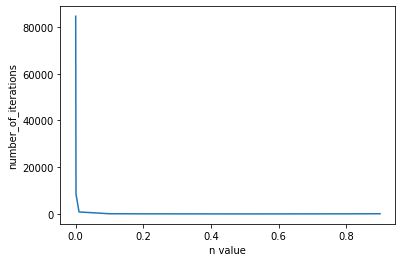

In [98]:
plt.plot(n,number_of_iterations1)
plt.xlabel('n value')
plt.ylabel('number_of_iterations')

#5. [R] With τ = 10−5 and η = 0.1, we will study the behavior of the algorithm for different starting points.Consider x0 ∈ {(10000, 10000),(500, 0),(0, 1000),(1, 1),(−500, −2)}. Prepare a table listing the final minimizer,final objective function value and number of iterations taken by the algorithm to terminate for the different starting points. Comment on your observations.


#Solution:

#table listing the final minimizer,final objective function value and number of iterations taken by the algorithm to terminate for the different starting points is following are

#98 is the maximum number of iteration and 76 is the minimum number of iteration for different starting points and final objective is approx zero.optimizer value approx equal to [-100,25]

|index|final\_minimizer|final\_objective|number\_of\_iterations|
|---|---|---|---|
|0|\[-99\.99999679  25\.00000317\]|2\.0414342669998657e-11|98|
|1|\[-99\.99999566  24\.99999982\]|1\.888746375147865e-11|84|
|2|\[-99\.99999954  25\.00000452\]|2\.060780080476227e-11|86|
|3|\[-99\.99999564  24\.99999896\]|2\.0052840841640608e-11|76|
|4|\[-100\.00000452   24\.99999974\]|2\.0526332936418612e-11|82|

In [99]:
final_minimizer2=[]
final_objective2=[]
number_of_iterations2=[]
a=[[10000, 10000],[500, 0],[0, 1000],[1, 1],[-500,2]]
for i in a:
  my_start_x = np.array(i)
  my_steplength = 0.1
  my_tol= 10**(-5)
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  final_minimizer2.append(opt_x)
  final_objective2.append(evalf(opt_x))
  number_of_iterations2.append(k)


In [100]:
final_minimizer2

[array([-99.99999679,  25.00000317]),
 array([-99.99999566,  24.99999982]),
 array([-99.99999954,  25.00000452]),
 array([-99.99999564,  24.99999896]),
 array([-100.00000452,   24.99999974])]

In [101]:
final_objective2

[2.0414342669998657e-11,
 1.888746375147865e-11,
 2.060780080476227e-11,
 2.0052840841640608e-11,
 2.0526332936418612e-11]

In [102]:
number_of_iterations2

[98, 84, 86, 76, 82]